In [28]:
base = '/u/ebanner/Classes/nlp/Project/irony-classifier'

In [3]:
base = '/u/npockrus/NLP/finalProject/venv/src/irony-classifier'

# Load Conservative Sentences

In [29]:
cd /{base}/data/conservative/features/text+sentiment+subreddit+label+progressiviness/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/text+sentiment+subreddit+label+progressiviness


In [30]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)

sentiments = [data[sentence]['sentiment'] for sentence in sorted(data)]
ys = np.array([ data[sentence]['label'] for sentence in sorted(data) ])

# Separate Positive and Negative Examples

In [38]:
plus_sentiments = [ sentiment for sentiment, y in zip(sentiments, ys) if y == 1 ]

minus_sentiments = [ sentiment for sentiment, y in zip(sentiments, ys) if y == -1 ]

# Sentiment in Ironic Comments

In [39]:
ironic_counts = [0, 0, 0, 0, 0]
for sentiment in plus_sentiments:
    ironic_counts[sentiment+2] += 1

In [40]:
min(plus_sentiments)

-2

In [41]:
max(plus_sentiments)

1

In [10]:
%matplotlib inline

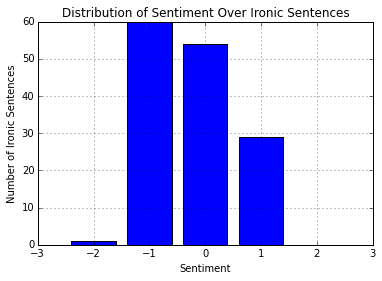

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)

axes.bar([-2, -1, 0, 1, 2], ironic_counts, align='center')

plt.xlabel('Sentiment')
plt.ylabel('Number of Ironic Sentences')
plt.title('Distribution of Sentiment Over Ironic Sentences')
plt.grid(True)

plt.show()

# Sentiment in Genuine Comments

In [44]:
genuine_counts = [0, 0, 0, 0, 0]
for sentiment in minus_sentiments:
    genuine_counts[sentiment+2] += 1

In [45]:
min(minus_sentiments)

-2

In [46]:
max(minus_sentiments)

2

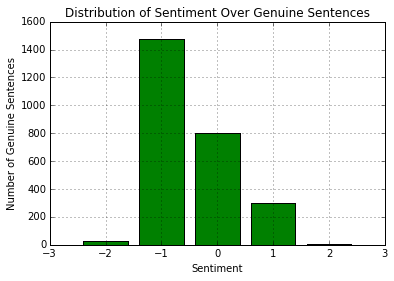

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)

axes.bar([-2, -1, 0, 1, 2], genuine_counts, align='center', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Number of Genuine Sentences')
plt.title('Distribution of Sentiment Over Genuine Sentences')
plt.grid(True)

plt.show()

# Total Breakdown of Sentiment Across All Comments

In [24]:
all_counts = [0, 0, 0, 0, 0]
for sentiment in sentiments:
    all_counts[sentiment+2] += 1

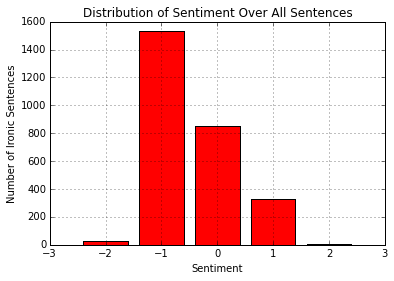

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)

axes.bar([-2, -1, 0, 1, 2], all_counts, align='center', color='red')

plt.xlabel('Sentiment')
plt.ylabel('Number of Ironic Sentences')
plt.title('Distribution of Sentiment Over All Sentences')
plt.grid(True)

plt.show()

# KL Divergence

In [97]:
import scipy.stats

scipy.stats.entropy([ count+1 for count in genuine_counts ], [ count+1 for count in ironic_counts ])

0.0557490386512451

# Same Distribution

In [92]:
import scipy.stats

scipy.stats.entropy(genuine_counts, genuine_counts)

0.0

# Very Different

In [104]:
import random

scipy.stats.entropy(sorted(genuine_counts, key=lambda *args: random.random()), genuine_counts)

0.58302268239797983